#### 识别数据中的缺失数值

In [2]:
import pandas as pd
from io import StringIO

csv_data = \
"""A, B, C, D
1., 2., 3., 4.
5,6,,8
10,11,12,"""
df = pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [3]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### 删除缺失的数据

In [6]:
df.dropna(axis=0,how="all") # 只有全是NaN才丢弃

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [17]:
df.columns

Index(['A', ' B', ' C', ' D'], dtype='object')

In [24]:
df.dropna(subset=[' C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### 填补缺失的数据

In [27]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values="NaN", strategy="mean", axis=0)
imr = imr.fit(df.values)
impute_data = imr.transform(df.values)
impute_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [39]:
import pandas as pd
df = pd.DataFrame([["green", "M", 10.1, "class1"],
                  ["red", "L", 13.5, "class2"],
                  ["blue", "XL", 15.3, "class1"]])
df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 映射序数特征

In [40]:
size_mapping = {"XL":3, "L":2,"M":1}
df["size"] = df["size"].map(size_mapping)

In [37]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [44]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}
df["size"].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [45]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [43]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [46]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values)
y

array([0, 1, 0])

In [47]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### 为名词特征做热编码

In [49]:
X = df[["color", "size", "price"]].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

### 为名词特征独热编码

In [51]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(categorical_features=[0])
one.fit_transform(X).toarray()
pd.get_dummies(df[["price", "color", "size"]], drop_first=True)

one = OneHotEncoder(categorical_features=[0])
one.fit_transform(X).toarray()[:, 1:]


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before t

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

## 分裂数据集为独立的训练集和测试集

In [58]:
import numpy as np
df_wine = pd.read_csv(r"C:\Users\admin\Desktop\myself\刷过的书\python_机器学习\wine_data.csv", header=None)
df_wine.columns = ["Class label", "Alcohol", "Malic acid", "Ash", "Alcalintiy of ash", "Magnesium", "Total phenls", 
                  "Flavanoids", "Nonflavanoid", "Proanthocynins", "Color intensity", "Hue", "OD280", "Proline"]
print("Class labels", np.unique(df_wine["Class label"]))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalintiy of ash,Magnesium,Total phenls,Flavanoids,Nonflavanoid,Proanthocynins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xTrainNorm = mms.fit_transform(xTrain)
xTestNorm = mms.fit_transform(xTest)

ex = np.array([0,1,2,3,4,5])
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
xTrainStd = stdsc.fit_transform(xTrain)
xTestStd = stdsc.transform(xTest)
print(xTestStd)

[[ 8.94437367e-01 -3.88117877e-01  1.10073064e+00 -8.12017114e-01
   1.13201117e+00  1.09807851e+00  7.12041017e-01  1.81013423e-01
   6.62804643e-02  5.12859235e-01  7.96297849e-01  4.48295020e-01
   1.90593792e+00]
 [-1.04879931e+00 -7.72993966e-01  5.41190056e-01 -2.40938809e-01
   3.49414498e-01 -7.07219221e-01 -3.08121293e-01  6.76138376e-01
  -1.03520519e+00 -9.06567274e-01  2.24570604e+00 -5.61881713e-01
  -1.22874035e+00]
 [ 1.64744158e+00 -4.13776283e-01  2.42768413e-01 -1.56343594e+00
  -2.19746720e-01  2.84881333e-01  4.47191186e-01 -5.61674005e-01
   5.74658458e-01  6.79643589e-02  2.98063782e-01  1.38631627e+00
   1.64471473e+00]
 [ 2.02159300e-01 -4.90751501e-01 -9.13615453e-01 -2.58536553e+00
   6.48338887e-02  5.28840485e-01  6.82613258e-01 -8.91757306e-01
  -6.11556861e-01 -3.00662824e-01  4.33945800e-01  1.12655654e+00
   9.07143373e-01]
 [-8.05894728e-01 -1.09800044e+00 -1.06282627e+00 -3.91222574e-01
  -7.88907938e-01  1.94380357e+00  1.65372930e+00 -1.05679896e+00


In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", solver="saga", multi_class="auto", max_iter=300)

lr.fit(xTrainStd, yTrain)

print(lr.score(xTrainStd, yTrain))

print(lr.score(xTestStd, yTest))

lr.coef_

1.0
1.0


array([[ 0.04540666,  0.        ,  0.        , -0.77663024,  0.        ,
         0.        ,  0.13106157,  0.        ,  0.        ,  0.        ,
         0.        ,  0.41558241,  0.87004963],
       [-1.47519882, -0.35305779, -0.92412638,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.26322711,
         0.4262763 ,  0.        , -1.48632891],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.3446849 ,  0.        ,  0.        ,  0.        ,
        -0.79814436, -0.83483855,  0.        ]])

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


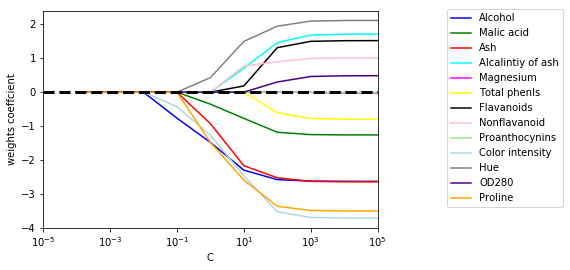

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty="l1", C=10**c, solver="saga", multi_class="auto", max_iter=300, random_state=0)
    lr.fit(xTrainStd, yTrain)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel("C")
plt.xscale("log")
plt.ylabel("weights coeffcient")
plt.legend(loc="upper left")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03),ncol=1,fancybox=True)
plt.show()    

## 用随机森林评估特征的重要性

 1)  Proline                          0.185453
 2)  Flavanoids                       0.174751
 3)  Color intensity                  0.143920
 4)  OD280                            0.136162
 5)  Alcohol                          0.118529
 6)  Hue                              0.058739
 7)  Total phenls                     0.050872
 8)  Magnesium                        0.031357
 9)  Malic acid                       0.025648
10)  Proanthocynins                   0.025570
11)  Alcalintiy of ash                0.022366
12)  Nonflavanoid                     0.013354
13)  Ash                              0.013279


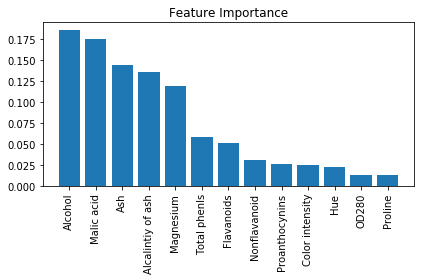

In [98]:
from sklearn.ensemble import RandomForestClassifier

featLabels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(xTrain, yTrain)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(xTrain.shape[1]):
    print("%2d)  %-*s %*f" % (f+1, 20, featLabels[indices[f]], 20,importances[indices[f]]))# 没有对齐
    
plt.title("Feature Importance")
plt.bar(range(xTrain.shape[1]), importances[indices], align='center')
plt.xticks(range(xTrain.shape[1]), featLabels, rotation=90)
plt.xlim([-1, xTrain.shape[1]])
plt.tight_layout()
plt.show()

In [90]:
indices[::-1]

array([ 2,  7,  3,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12], dtype=int64)